# GMIT HDip Data Analysis 2020. Machine Learning and Statistics tasks  

### Task 1 : Obtain approximation of $\sqrt{2}$ to 100 decimal places in Python (without using library functions)


$\sqrt{2}$ is an irrational number - it cannot be rendered exactly as a fraction, or in decimal notation, no matter how many decimal places are specified [1].   
One way of approximating the value is provided by Newton's Method. An iteration using the formula $$x_{n+1} = \frac{1}{2}(x_n + \frac{a}{x_n}) $$ approximates the $\sqrt{a}$, with each subsequent value of $x_{n+1}$ being closer to the actual value than $x_n$. A simple explanation of how it works is that if $x_n$ is too large, then $a/x_n$ will be smaller than the square root, and the mean value of $x_n$ and $a/x_n$ will be closer to the root than $x_n$ is. Similarly if $x_n$ is too small, $a/x_n$ is greater than the root and the mean of the sum is again closer than $x_n$ [2].   

[1] Proof that $\sqrt{2}$ is irrational ; https://www.homeschoolmath.net/teaching/proof_square_root_2_irrational.php  
[2] Square roots via Newton's method ; https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf  

Python code to demonstrate this, with a starting value of 1.5 (we know the square root of 2 is somewhere between 1 and 2), is given by :

In [12]:
# Approximate square root of 2 with a starting value of 1.5, using Newton's method
# We know the square root will be between 1 and 2, so we'll start at 1.5
ix = 1.5
new = 0
# Keep looping until the value produced by the last iteration equals that of the previous iteration
while (new != ix):
  new = ix
  ix = 0.5*(ix+2/ix)
# Display the result    
print(ix)
print(ix*ix)


1.414213562373095
1.9999999999999996


We see from running the above code that the square root is only calculated to 15 decimal places, and if we square the resulting value it doesn't quite equal 2. This is because of limitations in floating point arithmetic (arithmetic on non-whole numbers).
For example the decimal value 0.1 cannot be expressed exactly using the binary system employed by computers - it can only be approximated. This is true for all languages, not just Python.  
Floating point arithmetic in Python only provides accuracy to about 15 decimal places [3]. Integer arithmetic in Python however does not have this same level of constraint - the size of stored numbers is only restricted by hardware limitations [4].  
In order to achieve our required accuracy therefore we need to ensure all operations are carried out on integers, and not floating point numbers. We will replace the multiplication in the method above by 0.5 (a floating point number) with division by 2, and use the floor division operator '//' which returns the integer part of the result [5] instead of the simple division operator '/'. 

To obtain 100 decimal places using Newton's method we will need to start with an integer squared value containing the required
number (2 in this case) followed by 200 zeros (as $x^n * x^n = x^{2n}$). When we have the square root of this (to the accuracy of an integer followed by 100 zeros) we will format the result to insert a decimal point after the whole number part of the answer.  

(The created function is called 'sqrt2' as that's what we're told to do, but it will allow a positive integer argument so that 
 it can be tested against a number we know the exact root of - 4)

[3] Floating point arithmetic: issues and limitations ; https://python.readthedocs.io/en/latest/tutorial/floatingpoint.html  
[4] Numbers in Python; https://realpython.com/python-numbers/  
[5] Floor division; https://python-reference.readthedocs.io/en/latest/docs/operators/floor_division.html


In [4]:
def sqrt2(inum):
# Calculate the square root of an input positive integer to 100 decimal places.

# Create an integer of value 'inum' followed by 200 zeros (by creating a string and converting it to an integer).
# We will find the square root of this number, and then format it to appear as a decimal value with 100 decimal places.

  temp = str(inum) + (200*"0")
  squared = int(temp)
  
# Create an integer of value 1 followed by 100 zeros. Dividing the square root by this value to give the integer part of the 
# square root provides the length of the integer part in digits (not strictly needed here as we know the integer part of the 
# square root of 2 will be one digit long, but it makes it easy to apply the code to other positive integers if desired). 
  temp = "1" + (100*"0")
  divisor = int(temp)

# Use Newton's method to get an approximation of the square root
# This uses the iteration x(n+1) = 0.5(x(n) + (a/x(n))), where 'a' is the number whose square root we are finding, x(n) is the 
# n'th estimate, and x(n+1) is the subsequent approximation. A simple explanation of how it works is that if 'x(n)' is too 
# large, then a/x(n) will be smaller than the square root, and the mean value of x(n) and a/x(n) will be closer to the root 
# than x(n) is. Similarly if x(n) is too small, a/x(n) is greater than the root and the mean of the sum is again 
# closer than x(n).

# Keep looping until there is no change in the value of the root from one iteration to the next
# Avoid generating floating point numbers by using the floor division operator (divide by 2 rather than multiply by 0.5) - in 
# this way we can handle very large integers without losing accuracy.
  root = 1
  saved = 0
  while (saved != root):
    saved = root
    root = (saved + squared//saved)//2

# We now have the approximate root of '2' followed by 200 zeros.
# We can't just divide to get a floating point number as we then lose the required accuracy, so we convert to a string and 
# stick the decimal point in the required place (after the first digit in this case).
  ans = str(root)

# Get the whole number part of the answer by dividing by the number '1' followed by 100 zeros, and find its length (so we can
# put the decimal place in the right position in the final answer).
  whole = root//divisor
  i=len(str(whole))
  wlen=i
  
# Loop through all the digits in the answer, adding them to the string 'sqr', and putting a decimal point in after the integer 
# part
  sqr=""
  for d in ans:
    i-=1
    sqr+=d
# Put the decimal point in after the whole number part    
    if i == 0:
      sqr+="."

# Display the answer (+ve and -ve values), and its length (just to illustrate that it is actually to 100 decimal places).
# Subtract 1 for the decimal point, and the length of the integer part of the value, from the overall length, to get the 
# number of decimal places.
  print("\nSquare roots of ",inum," - ")
  print("(Number of decimal places -",(len(sqr)-1-wlen),")") 
  print("+",sqr)
  print("-",sqr) 

# Call the function to calculate the square root of 4, which we know is exactly 2, to check it first
sqrt2(4)

# Now get the required square root (of 2)
sqrt2(2)


Square roots of  4  - 
(Number of decimal places - 100 )
+ 2.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
- 2.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Square roots of  2  - 
(Number of decimal places - 100 )
+ 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
- 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


Perform a further check on the answer using the standard library module 'decimal', which can be used to perform arithmetic to 
high precision [6]  
[6] Arbitrary precision of square roots; https://stackoverflow.com/questions/10725522/arbitrary-precision-of-square-roots

In [2]:
# Get the 'decimal' module
from decimal import *
# Set the precision
getcontext().prec = 101
print("\nSquare root using Python Decimal module - ")
# Get the square root of 2
print(" ",Decimal(2).sqrt())


Square root using Python Decimal module - 
  1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


This gives the same value as the function 'sqrt2'- extra confirmation that the answer is correct.

### Task2 : Perform a Chi-squared statistical test against a small table obtained from the Wikipedia page about Chi-squared, and provide some analysis of the test. Confirm the statistical value is approximately 24.6, and get the associated p-value.  

The Chi-squared test may be used to determine if there is a statistically significant difference between expected and observed frequencies of categorical data, eg males / females in  a sample of the population looking at gender difference between smokers [1]. It is not applicable to numerical data.   

The case considered here is based on hypothetical data taken from Wikipedia, for the residential locations of people from three occupational classes (white collar, blue collar, no collar) living in 4 city districts. We are testing to see if neighbourhood of residence is independent of occupation.  

The formula used to calculate the Chi-squared value is : $\sum{\frac{(O-E)^2}{E}}$ , where 'O' is the observed value and 'E' is the expected value [2]. The expected value is based on the proportion of the overall total present in each individual category.  

If the data is tabulated, with one category represented by columns and the other by rows, then the Expected values are calculated as the product of the values in the rows and the values in the columns, divided by the overall total [2], eg  

If we had two entries in Category 1, A and B, and 2 in Category 2, X and Y we may write some observed values as eg:  
[3]

Category | A | B | Total
--- | --- | --- | --- 
__X__ |37 | 59 | 96
__Y__ | 25 | 43 | 68
__Total__ | 62 | 102 | 164  

A table of Expected values would then be :

Category | A Expect | B Expect | Total
--- | --- | --- | --- 
__X Expect__ |$\frac{96 * 62}{164}$ | $\frac{96 * 102}{164}$ | 96
__Y Expect__ | $\frac{68 * 62}{164}$ | $\frac{68 * 102}{164}$ | 68
__Total__ | 62 | 102 | 164  

which equates to :  

Category | A Expect | B Expect | Total
--- | --- | --- | --- 
__X Expect__ |36.29 | 59.71 | 96
__Y Expect__ | 25.71 | 42.29 | 68
__Total__ | 62 | 102 | 164  

Applying the equation above yields :  

$\frac{(37-36.29)^2}{36.29} + \frac{(59 - 59.71)^2}{59.71} + \frac{(25 - 25.71)^2}{25.71} + \frac{(43 - 42.29)^2}{42.29}$  

= 0.014 + 0.008 + 0.020 + 0.012 = 0.054  which is the Chi-squared value.

The statistic provides a measure of whether the categories are independent or not, eg if the categories were male and female students taking arts and science courses, if there is no link between gender and course taken you would expect roughly equal proportions of males and females, allowing for the total numbers of each gender type present, taking each category of course. [4] The null hypothesis for the test is that there is no connection between the variables (they are independent). If the observed values are significantly different from the expected values then the hypothesis would be rejected and you would conclude that the variables are linked [5]. The p-value returned by the test is used to conclude whether or not the variables are likely to be independent. If the p-value is <= the significance level then conclude the evidence is that the observed and expected values are different, and therefore the variables are related [5].  
The test is sensitive to sample size. It is not appropriate to use if any cross-tabulation cells (individual elements in the table) have fewer than 5 cases (a single element in the sample may then have an inappropriately large influence on the result), or if sample sizes are large (roughly > 500), when small differences between observed and expected values may be deemed statistically significant [6]. Choosing appropriate categories may help to address this issue.

[1] Chi-squared test ; https://en.wikipedia.org/wiki/Chi-squared_test  
[2] Chi-square test  ; https://www.mathsisfun.com/data/chi-square-test.html  
[3] Markdown table syntax ; https://www.makeuseof.com/tag/create-markdown-table/  
[4] What does a Chi-square statistic tell you ; https://www.investopedia.com/terms/c/chi-square-statistic.asp#:~:text=Chi%2Dsquare%20tests%20are%20often,of%20variables%20in%20the%20relationship.    
[5] Overview of the Chi square test of independence ; https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/#:~:text=For%20a%20Chi%2Dsquare%20test,exists%20between%20the%20categorical%20variables.  
[6] What are special concerns with regard to the Chi square statistic ; https://www.statisticssolutions.com/using-chi-square-statistic-in-research/

Our table from Wikipedia with rows as occupational categories and columns as neighbourhoods is :  

Category | A | B | C | D | Total
--- | --- | --- | --- | --- | ---
__White collar__ | 90 | 60 | 104 | 95 | 349
__Blue collar__ | 30 | 50 | 51 | 20 | 151
__No collar__ | 30 | 40 | 45 | 35 | 150
__Total__ | 150 | 150 | 200 | 150 | 650

Using the 'scipy' library, first hard code the table into the code and try the test :

In [41]:
# Import the scipy Chi-squared functions
# ref https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
from scipy.stats import chi2_contingency

# Put the data taken from Wikipedia into a table 
table = [	[90, 60, 104, 95],
			[30,  50,  51, 20],
            [30,  40,  45, 35]]

# Perform the test. This returns 3 individual values, the Chi-square statistic, p-value and degrees of freedom, 
# and a table of expected values
stat, p, df, expVals = chi2_contingency(table)

# Print out the Chi-squared stat, p value and degrees of freedom
print('\nstat=%.2f ; p=%2f ; degrees of freedom=%2d \n' % (stat,p,df))

# Get the overall total value for the table (the sample size)
total = 0
for i in range(len(table)):
    for j in range(len(table[0])):
        total += table[i][j]

# Calculate and display the individual contributions to the test statistic from each element in the table, using
# (observed - expected)**2 / expected
sum = 0
for i in range(len(table)):
    for j in range(len(table[0])):
        chiSq = ((table[i][j]-expVals[i][j])**2)/expVals[i][j]
        sum += chiSq
        print(chiSq," (",table[i][j]," ",expVals[i][j],")")
        
# Check we have the right test statistic using this calculation        
print("\nChi squared value - ",sum)        


stat=24.57 ; p=0.000410 ; degrees of freedom= 6 

1.1115274410403364  ( 90   80.53846153846153 )
5.237601939607668  ( 60   80.53846153846153 )
0.10667842186466842  ( 104   107.38461538461539 )
2.596723238557052  ( 95   80.53846153846153 )
0.6739684156902702  ( 30   34.84615384615385 )
6.590083205977245  ( 50   34.84615384615385 )
0.44332654100866054  ( 51   46.46153846153846 )
6.32518254372559  ( 20   34.84615384615385 )
0.6153846153846149  ( 30   34.61538461538461 )
0.8376068376068384  ( 40   34.61538461538461 )
0.02884615384615382  ( 45   46.15384615384615 )
0.004273504273504322  ( 35   34.61538461538461 )

Chi squared value -  24.5712028585826


The p-value obtained from the test (0.00041) is < 0.05, and consequently we would conclude that the variables are not independent of each other. The p-value comes from the probability distribution of the Chi-squared test, and is the probability of getting results at least as extreme as the observed values if the null hypothesis is true [7] The probability distribution is dependent on the number of degrees of freedom (number of columns - 1) * (number of rows -1) (here 3 * 2 = 6).  

The values in the table that give the highest contribution to the Chi-squared result are the ones that differ most from the expected values (with the expectation being that the variables are independent). If our conclusion is that the variables are not independent, these are the values that most strongly contribute to that conclusion. In this case they are :

60 white collared workers in neighbourhood B (Chi square value 5.24)
50 blue collared workers in neighbourhood B (Chi square value 6.59)
20 blue collared workers in neighbourhood D (Chi square value 6.32)

If the variables were independent more white collared workers would have been expected to be in area B (about 80), fewer blue collared workers in area B (about 35) and more blue collared workers in area D (about 35).  

This reflects what might be expected perhaps in a real life analysis of the occupations of residents in particular areas of cities. Frequently more expensive and cheaper housing are segregated to some extent, and those with lower incomes would not be able to afford to live in more expensive accommodations.  

[7] p-value ; https://en.wikipedia.org/wiki/P-value

### Task 3 : Assess two Excel algorithms that provide values for Standard Deviation - STDEV.P and STDEV.S.
For a set of 'n' values ('n' > 1), STDEV.P divides the square root of the sum of the square of the difference between each value and the mean of the 'n' values by '$\sqrt{n}$', while STDEV.S uses 'n-1' instead of 'n' [1]. This is know as Bessel's Correction, and is used when estimating the Standard Deviation of a sample of a population where the true mean of the population is not known [2]. 
Standard Deviation (SD) provides a measure of how spread out a set of values are. The further values are from the mean the higher the value of the SD. eg consider two sets of two values : -100,100 and -1,1. The mean for both pairs is 0, but the spread of the first pair is much greater than for the second pair. The sum of the squares of the values are 20000 and 2 respectively. The SD is then $\sqrt(\frac{20000}{2})$ or $\sqrt(\frac{20000}{1})$ and $\sqrt(\frac{2}{2})$ or $\sqrt(\frac{2}{2})$ respectively (based on STDEV.P and STDEV.S).  
If the set of values being assessed represent all of the values of interest - it is not a sample of a population - then the mean used in the calculation is the true mean for the population. If however the values are part of a population (a sample) then the mean used in the calculation is the sample mean, and may well differ from the actual population mean. In this case the sum of the square of the differences from the sample mean is likely to be less than what it would be for the actual population mean. Consequently dividing by (n-1) rather than 'n' is likely to provide a better estimate of the SD [3].  If 'n-1' values of sample are known, and the mean, then the 'nth' value can be calculated - there are 'n-1' degrees of freedom.  

We'll check how the standard deviation compares for a population of 5000 random integers, and for samples taken from that population using both 'n' and 'n-1' as the divisor. Taking the mean of the standard deviation for 100 samples, each of size 50, that are taken randomly from the whole population, we get :  

[1] https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285  
[2] https://en.wikipedia.org/wiki/Bessel%27s_correction
[3] https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation


In [13]:
import numpy as np
import random

# Get a list of 500 random integers in the range -100 to 100
# ref https://www.techbeamers.com/python-generate-random-numbers-list/
pop = [random.randint(-100, 100) for iter in range(5000)]

# Get random samples from the population
# ref https://note.nkmk.me/en/python-random-choice-sample-choices/
n0 = 0
n1 = 0 
numSamps = 100
for i in range (numSamps):
    sample = random.sample(pop,50)
    n0 += np.sqrt(np.sum((sample - np.mean(sample))**2)/len(sample))
    n1 += np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample)-1))

realSD = np.sqrt(np.sum((pop - np.mean(pop))**2)/len(pop))    
print("Population Standard Deviation                       - ",realSD)    
print("Mean sample Standard Deviation with divisor = n     - ",n0/numSamps)
print("Mean sample Standard Deviation with divisor = (n-1) - ",n1/numSamps)



Population Standard Deviation                       -  58.02163342719679
Mean sample Standard Deviation with divisor = n     -  56.57384379929246
Mean sample Standard Deviation with divisor = (n-1) -  57.148212268954595


As expected, the mean of the standard deviations where the divisor used is 'n-1' is closer than it is for a divisor of 'n'.  
If single samples are used, the larger the sample size, the greater the likely accuracy of the sample SD to the SD for the whole population :

In [32]:
def singleSample(numSamps):
  sample = random.sample(list(pop),numSamps)
  print("\nSample size - ",numSamps)
  print("Single sample Standard Deviation with divisor = n       - ",np.sqrt(np.sum((sample - np.mean(sample))**2)/len(sample)))
  print("Single sample Standard Deviation with divisor = (n-1)   - ",np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample)-1)))

print("\nActual population standard deviation - ",realSD)     
singleSample(3)
singleSample(500)
singleSample(1000)
singleSample(4999)


Actual population standard deviation -  58.36321607827999

Sample size -  3
Single sample Standard Deviation with divisor = n       -  42.96768811819205
Single sample Standard Deviation with divisor = (n-1)   -  52.62445565830903

Sample size -  500
Single sample Standard Deviation with divisor = n       -  58.15013313828266
Single sample Standard Deviation with divisor = (n-1)   -  58.208370642250856

Sample size -  1000
Single sample Standard Deviation with divisor = n       -  59.78874057880798
Single sample Standard Deviation with divisor = (n-1)   -  59.818657388575446

Sample size -  4999
Single sample Standard Deviation with divisor = n       -  58.368945032956994
Single sample Standard Deviation with divisor = (n-1)   -  58.37478397110324


The same reasoning applies to different population distributions. Above, the distribution was uniform, but if a population with Normal distribution is considered the formula for calculating Standard Deviation does not change, eg :

In [30]:
pop = np.random.normal(scale = 2,size = 5000)
realSD = np.sqrt(np.sum((pop - np.mean(pop))**2)/len(pop))
print("\nActual population standard deviation - ",realSD)     
singleSample(3)
singleSample(500)
singleSample(1000)
singleSample(4999)


Actual population standard deviation -  2.0172660720315743

Sample size -  3
Single sample Standard Deviation with divisor = n       -  2.6887039761391276
Single sample Standard Deviation with divisor = (n-1)   -  3.29297640546657

Sample size -  500
Single sample Standard Deviation with divisor = n       -  1.9922370558101923
Single sample Standard Deviation with divisor = (n-1)   -  1.9942322862109108

Sample size -  1000
Single sample Standard Deviation with divisor = n       -  1.973389872285969
Single sample Standard Deviation with divisor = (n-1)   -  1.9743773078605384

Sample size -  4999
Single sample Standard Deviation with divisor = n       -  2.016981437286741
Single sample Standard Deviation with divisor = (n-1)   -  2.017183206050041


The Central Limit Theorem demonstrates that for many probability distributions, the distribution of sample means will be Normal, and Bessel's correction remains valid provided sample sizes are large enough (>= 30). [4]  
[4] Central Limit Theorem ; https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html

### Task 4 : Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set   
Explanation of how the code works, how accurate it might be, and how the model can be used to make predictions of species
of iris.  

The data of petal length/width and sepal length/width, provided by a collection of fifty samples each of three species of
Iris (Setosa, Virginica and Versicolor) are held in a well know dataset[1]. Each of the 150 entries in the data holds the 4 measurements and the associated species. Here we examine a machine learning model, 'kmeans', that clusters the data
into distinct groups, to enable us to say which species a new sample is likely to belong to (given its measurements)[2].  
The dataset is held in the 'sklearn' library, so we'll download it from there and then display it using 2 scatter plots
to get a visual image of it [3]:

[1] https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
[2] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
[3] https://stackoverflow.com/questions/35105781/missing-labels-in-matplotlib-scatter-plot-legend


Scatter plots of Iris dataset
( ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] )


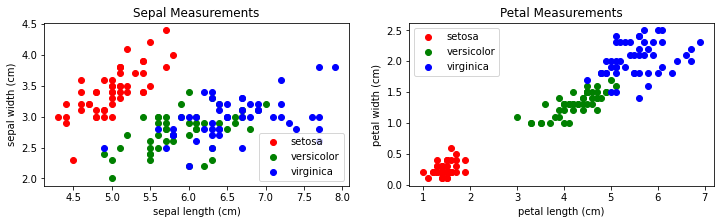

In [2]:
# Get KMeans [1]
from sklearn.cluster import KMeans
# Use pandas for dataframe processing [2]
import pandas as pd
# Get an accuracy score metric [3]
from sklearn.metrics import accuracy_score
# Use numpy for processing the input array
import numpy as np
# Use matplotlib for plots
import matplotlib.pyplot as plt
# The Iris dataset is a standard, held in sklearn
from sklearn import datasets
# Get functions from sklearn to pre-process the data [6]
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Load the Iris dataset
iris = datasets.load_iris()

# Convert it to pandas dataframes, for ease of processing
# Separate it into 4 columns holding the actual measurements (Sepal Length, Sepal Width, Petal Length, Petal Width) and a 
# column showing which species of Iris each measurement belongs to (in 'y')
# ref https://vitalflux.com/convert-sklearn-dataset-pandas-dataframe/
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

# Define some colours for plotting the data - to check what it looks like
colors = ['red', 'green', 'blue']
print("\nScatter plots of Iris dataset")

# Draw Scatter plots of Sepal Length vs Sepal Width and Petal Length vs Petal Width to get a visual image of the data 
# ref https://stackoverflow.com/questions/35105781/missing-labels-in-matplotlib-scatter-plot-legend
plt.figure(figsize=(12,3))
def sepal_plot():
  for target in set(iris.target):
    xx = [iris.data[i,0] for i in range(len(iris.target)) if iris.target[i]==target]
    yy = [iris.data[i,1] for i in range(len(iris.target)) if iris.target[i]==target]
    plt.scatter(xx, yy, color=colors[target], label=iris.target_names[target])
  plt.xlabel(iris.feature_names[0])
  plt.ylabel(iris.feature_names[1])
  plt.legend(iris.target_names)

plt.subplot(1, 2, 1)
sepal_plot()
plt.title('Sepal Measurements')

def petal_plot():
  for target in set(iris.target):
    xx = [iris.data[i,2] for i in range(len(iris.target)) if iris.target[i]==target]
    yy = [iris.data[i,3] for i in range(len(iris.target)) if iris.target[i]==target]
    plt.scatter(xx, yy, color=colors[target], label=iris.target_names[target])
  plt.xlabel(iris.feature_names[2])
  plt.ylabel(iris.feature_names[3])
  plt.legend(iris.target_names)

plt.subplot(1,2,2)
petal_plot()
plt.title('Petal Measurements')
plt.show()

From the plots create a list of the approximate centre values for each species for each measurement, in the order they are held in the data columns - sepal length, sepal width, petal length, petal width  
We'll use this later to run Kmeans to predict which species these measurements are likely to belong to (knowing what the 
answers should be), as a check on the Kmeans 'predict' function, after the model has been trained on the dataset. We'll put them in the order Setosa, Versicolor, Virginica. Plot them to show where they are :


Illustration of where test values are for later check on Kmeans 'predict'



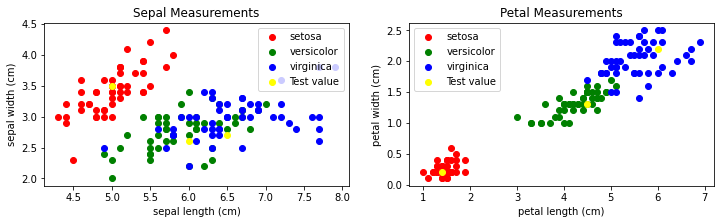

In [15]:
testValues = [[5.0,3.5,1.4,0.2],[6.0,2.6,4.5,1.3],[6.5,2.7,6.0,2.2]]
tval = np.reshape(testValues, (3, 4))
tval = pd.DataFrame(tval,columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

print("\nIllustration of where test values are for later check on Kmeans 'predict'\n")
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
sepal_plot()
plt.scatter([i[0] for i in testValues], [i[1] for i in testValues], color="yellow", label="Test value")
plt.legend()
plt.title('Sepal Measurements')
plt.subplot(1, 2, 2)
petal_plot()
plt.scatter([i[2] for i in testValues], [i[3] for i in testValues], color="yellow", label="Test value")
plt.legend()
plt.title('Petal Measurements')  
plt.show()                       

We can see above that the test values are clearly located in each species sub-group.  

Kmeans is unsupervised, which means it looks for structured patterns in the data set based on unlabelled values [4]. In this case, kmeans clusters the data based on the measured lengths, with no reference to the associated species. It randomly shuffles its input data, and then assigns each data point to a sub-group, where data points that have similar characteristics are clustered together[5]. Kmeans requires the number of clusters to form as an input parameter. In this instance we know there are 3 distinct species of flower from which measurements have been taken, so we would be looking to form 3 clusters, if possible. If this were not known we might need to determine the optimal number of clusters to use. This can be done using what is known as the 'elbow method' - for a given number of clusters, the optimal sub-grouping of data points is determined, and the sum of the square of the distance for each data point from the centre point (like the centre of mass of a physical object) for the cluster that the data point belongs to is calculated (known as the inertia). The inertial values are plotted against the number of clusters, and the plot examined to see if there is a clear turning point (or elbow), where the benefit of adding new clusters causes only a small decline in the inertia [6].
[4] https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a  
[5] How can kmeans be improved by using better initialization ; https://www.sciencedirect.com/science/article/pii/S0031320319301608  
[6] https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/  

We'll examine the Iris daatset for the 'elbow' :

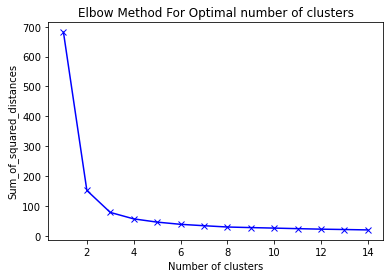

array([1, 0, 2])

In [4]:
#ref https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k).fit(x)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal number of clusters')
plt.show()


The plot of the 'elbow' method above illustrates that the change in the sum of the squared distances flattens off considerably 
when the number of clusters increases beyond 3. This confirms that it is best to use 3 clusters for our Kmeans model for this particular input dataset (as we would have hoped, as we know we have 3 species of flower).  

We'll run Kmeans again, with 3 clusters. The algorithm doesn't know what order the categories (species) are in in the input dataset - we only give it the measurements, therefore when it produces the clusters they may not be arranged in the same order as the species are in. If we check the labels of the clusters (given by 'kmeans.labels_'), then considering the order the species are in (labels 0, 1 and 2), and we can re-order the cluster ids appropriately (so that when we plot the clusters we'll be using the same colours as we use for the associated species [7]).  
[7] https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

In [5]:
# Run 'kmeans' to cluster the data, using the number of clusters as determined above (3), and the measurements in the input 
# database to train the model. 
kmeans = KMeans(init="k-means++",n_clusters=3,random_state=0).fit(x)

# Check what order the labels are in that have been created - so we can re-order them to use the same colours when 
# showing plots of the actual data against the generated clusters
print("Labels - ",kmeans.labels_)

Labels -  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


We see the '0' values are at the end, the '1's at the beginning and the '2's in the middle. We re-order by choosing those
at the end first, then those at the beginning, then the ones in the middle, by using 'np.choose' with values 2, 0, 1 -

In [6]:
# Reorder the cluster ids.
predictedY = np.choose(kmeans.labels_, [2, 0, 1]).astype(np.int64)

Now produce plots of the original data and the clusters produced by Kmeans, so we can visually inpsect the results and 
easily compare them, including the centre points (centroids) of the resulting sub-groups [8] -  
[8] https://constantgeeks.com/2017/01/11/playing-with-iris-data-kmeans-clustering-in-python/


Plots demonstrating the Kmeans clustering groups



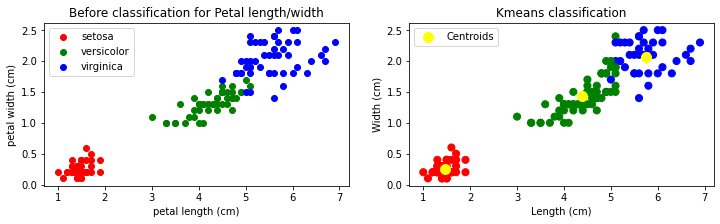

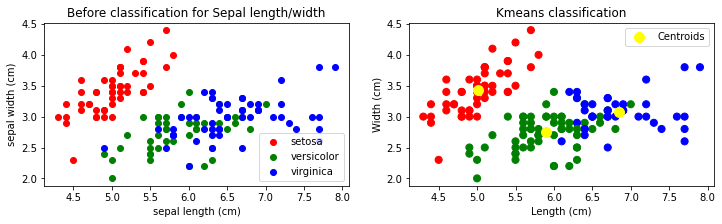

In [16]:
# Produce plots that illustrate how the model has grouped the data compared to the actual distribution by species,
# starting with petal length/width
print("\nPlots demonstrating the Kmeans clustering groups\n")
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
petal_plot()
plt.title('Before classification for Petal length/width')
colors = np.array(['red', 'green', 'blue'])

# Plot the classifications according to kmeans, including the centre points for each cluster
# ref https://constantgeeks.com/2017/01/11/playing-with-iris-data-kmeans-clustering-in-python/
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY], s=50)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("Length (cm)")
plt.ylabel("Width (cm)")
plt.title("Kmeans classification")
plt.legend()
plt.show()

# Do the same plots for Sepal length / Sepal width
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
sepal_plot()
plt.title('Before classification for Sepal length/width')
 
plt.subplot(1, 2, 2)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[predictedY], s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("Length (cm)")
plt.ylabel("Width (cm)")
plt.title("Kmeans classification")
plt.legend()
plt.show()

We can check how accurate the kmeans sub-grouping is relative to our actual groups (of species) using 'accuracy_score', which compares the labels for the input dataset with those of the generated clusters, to see how many are the same [9].  
We can also see how spread out from the centroids the generated clusters are (termed the 'inertia' of the output from the model) - a measure of how well placed the centre points are, using 'kmeans.inertia' [10].  
[9] https://stackoverflow.com/questions/53462437/finding-accuracy-for-this-k-means-mode  
[10] https://constantgeeks.com/2017/01/11/playing-with-iris-data-kmeans-clustering-in-python/

In [8]:
# Check how accurate the Kmeans sub-grouping is with respect to the actual grouping by species 
#ref https://stackoverflow.com/questions/53462437/finding-accuracy-for-this-k-means-model
print("Accuracy score - ",accuracy_score(y['Target'], predictedY))

# Get a measure of how spread out from the centre points the data are (the inertia), based on which sub-group each data point 
# has been assigned to by kmeans
#ref https://constantgeeks.com/2017/01/11/playing-with-iris-data-kmeans-clustering-in-python/
print("Inertia        - ",kmeans.inertia_)

Accuracy score -  0.8933333333333333
Inertia        -  78.851441426146


If the data in one input variable is at a different scale to the other input variables (with much greater numerical values), this will have an unduly large influence on the clusters produced by Kmeans. This can be addressed by 'scaling' the input values - to fit the range for each input variable into the same scale so that the model is not biased by one input having much higher values than another [11]. Lets apply scaling here and recheck the results -  
[11] https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7


Kmeans clustering after scaling has been applied to the dataset


With Scaling :

Accuracy score -  0.8333333333333334
Inertia Scaled -  139.82049635974974


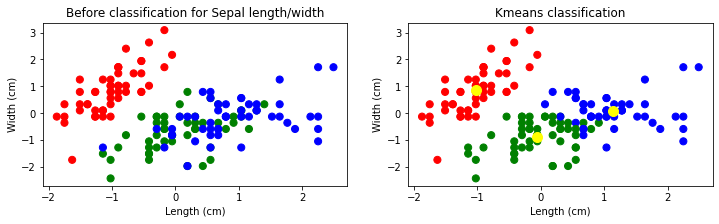

In [9]:
print("\nKmeans clustering after scaling has been applied to the dataset\n")
# Apply scaling to the data to see if kmeans prediction gives greater accuracy
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
px = pd.DataFrame(scaled_x, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

kmeans = KMeans(n_clusters=3,random_state=0).fit(scaled_x)
predictedY = np.choose(kmeans.labels_, [2, 0, 1]).astype(np.int64)
print("\nWith Scaling :\n")
print("Accuracy score - ",accuracy_score(y['Target'], predictedY))
print("Inertia Scaled - ",kmeans.inertia_)

plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.scatter(px['Sepal Length'], px['Sepal Width'], c=colors[y['Target']], s=50)
plt.xlabel("Length (cm)")
plt.ylabel("Width (cm)")
plt.title('Before classification for Sepal length/width')
 
# Plot the classifications according to the model
plt.subplot(1, 2, 2)
plt.scatter(px['Sepal Length'], px['Sepal Width'], c=colors[predictedY], s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("Length (cm)")
plt.ylabel("Width (cm)")
plt.title("Kmeans classification")
plt.show()


The scaling process has resulted in Kmeans giving clusters that don't reflect the actual data regarding which species each 
data point belongs to as well as for the unscaled data. Our input values are all of a similar magnitude - we don't have eg sepal lengths that are 100's of times bigger than petal lengths, so the scaling process has not helped to categorise the data.  

Each time Kmeans is run the start positions for the centre points is selected at random, so potentially we may get different results with different runs. Checking the accuracy and inertia will indicate if we may get better clusters sometimes if we run Kmeans multiple times - 


In [10]:
for i in range(10):
  kmeans = KMeans(init="k-means++",n_clusters=3,random_state=0).fit(x)
  predictedY = np.choose(kmeans.labels_, [2, 0, 1]).astype(np.int64)
  print("Accuracy score - ",accuracy_score(y['Target'], predictedY))
  print("Inertia        - ",kmeans.inertia_)

Accuracy score -  0.8933333333333333
Inertia        -  78.851441426146
Accuracy score -  0.8933333333333333
Inertia        -  78.851441426146
Accuracy score -  0.8933333333333333
Inertia        -  78.851441426146
Accuracy score -  0.8933333333333333
Inertia        -  78.851441426146
Accuracy score -  0.8933333333333333
Inertia        -  78.851441426146
Accuracy score -  0.8933333333333333
Inertia        -  78.851441426146
Accuracy score -  0.8933333333333333
Inertia        -  78.851441426146
Accuracy score -  0.8933333333333333
Inertia        -  78.851441426146
Accuracy score -  0.8933333333333333
Inertia        -  78.851441426146
Accuracy score -  0.8933333333333333
Inertia        -  78.851441426146


Multiple runs are producing the same results. This is because the 'shape' of the data is reasonably uniform and so the clusters and centroids end up the same with each run. Some data sets may have complex distributions that produce local minima for the inertia that differ from the global minimum, and the algorithm may sometimes choose different clusters as a result with different runs [12].   

Finally, run Kmeans to predict which species a random new sample is likely to belong to, given its measurements. We'll test it out here using the 3 sets of test values (in 'tvals') for measurements we set up earlier, which were deliberately chosen to be clearly within the clusters of the 3 species, in order 0. Setosa 1. Versicolor and 2. Virginica  
Display the test values, get the kmeans prediction and show the cluster centres that were calculated by kmeans.  
Also, redisplay the plot of actual values and test values to easily check the results [13].  

[12] Global optimization and metaheuristics; https://en.wikipedia.org/wiki/K-means_clustering
[13] Introducing kmeans; https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

   Sepal Length  Sepal Width  Petal Length  Petal Width
0           5.0          3.5           1.4          0.2
1           6.0          2.6           4.5          1.3
2           6.5          2.7           6.0          2.2

Predictions -  [1 2 0]

Cluster centres -  [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


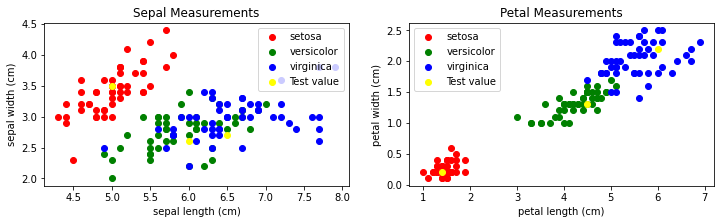

In [11]:
kmeans = KMeans(init="k-means++",n_clusters=3,random_state=0).fit(x)
print(tval)
#ref https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
print("\nPredictions - ",kmeans.predict(tval))
print("\nCluster centres - ",kmeans.cluster_centers_)
# Show the scatter plots to illustrate the results 
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
sepal_plot()
plt.scatter([i[0] for i in testValues], [i[1] for i in testValues], color="yellow", label="Test value")
plt.legend()
plt.title('Sepal Measurements')
plt.subplot(1, 2, 2)
petal_plot()
plt.scatter([i[2] for i in testValues], [i[3] for i in testValues], color="yellow", label="Test value")
plt.legend()
plt.title('Petal Measurements')  
plt.show()



It's easiest to see which cluster is predicted for which value by looking at the Petal length and width.  
The first set of measurements is predicted to have array value '1', which looking at the cluster centre array has values 
(1.462,0.246), which is the cluster centre within the Setosa values. The second predicted array value is 2, with associated cluster centre (4.39,1.43) - the cluster centre in the versicolor values, and the 3rd predicted value is 0 - the cluster centre in the virginca values. We see therefore that kmeans has predicted the correct cluster centres for the 3 test value measurements.